## Classroom exercise: energy calculation

### Diffusion model in 1D

Description: A one-dimensional diffusion model. (Could be a gas of particles, or a bunch of crowded people in a corridor, or animals in a valley habitat...)

- Agents are on a 1d axis
- Agents do not want to be where there are other agents

Implementation:

- Given a vector $n$ of positive integers, and of arbitrary length
- Compute the energy, $E(n) = \sum_i n_i(n_i - 1)$
- Later, we will have the likelyhood of an agent moving depend on the change in energy.

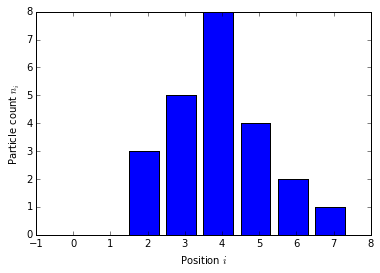

In [9]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

density =  np.array([0, 0, 3, 5, 8, 4, 2, 1])
fig, ax = plt.subplots()
ax.bar(np.arange(len(density))-0.5, density)
ax.xrange=[-0.5, len(density)-0.5]
ax.set_ylabel("Particle count $n_i$")
ax.set_xlabel("Position $i$")

Here, the total energy due to position 2 is $3 (3-1)=6$, and due to column 7 is $1 (1-1)=0$. We need to sum these to get the
total energy.

### Starting point

Create a Python module:

In [10]:
%%bash
mkdir -p diffusion
touch diffusion/__init__.py

* Implementation file: diffusion_model.py

In [11]:
%%writefile diffusion/model.py
def energy(density, coeff=1.0):
  """ Energy associated with the diffusion model

      Parameters
      ----------

      density: array of positive integers
          Number of particles at each position i in the array
      coeff: float
          Diffusion coefficient.
  """
  # implementation goes here

Overwriting diffusion/model.py


* Testing file: test_diffusion_model.py

In [12]:
%%writefile diffusion/test_model.py
from model import energy
def test_energy():
  """ Optional description for nose reporting """
  # Test something

Overwriting diffusion/test_model.py


Invoke the tests:

In [13]:
%%bash
cd diffusion
nosetests

.
----------------------------------------------------------------------
Ran 1 test in 0.000s

OK


Now, write your code (in `model.py`), and tests (in `test_model.py`), testing as you do.

### Solution

Don't look until after class!

In [14]:
%%writefile diffusion/model.py
"""  Simplistic 1-dimensional diffusion model """

def energy(density):
  """ Energy associated with the diffusion model
      :Parameters:
        density: array of positive integers
           Number of particles at each position i in the array/geometry
  """
  from numpy import array, any, sum

  # Make sure input is an numpy array
  density = array(density)

  # ...of the right kind (integer). Unless it is zero length, 
  #    in which case type does not matter.
    
  if density.dtype.kind != 'i' and len(density) > 0:
    raise TypeError("Density should be a array of *integers*.")
  # and the right values (positive or null)
  if any(density < 0):
    raise ValueError("Density should be an array of *positive* integers.")
  if density.ndim != 1:
    raise ValueError("Density should be an a *1-dimensional*"+
                     "array of positive integers.")
  
  return sum(density * (density - 1))

Overwriting diffusion/model.py


In [15]:
%%writefile diffusion/test_model.py
""" Unit tests for a diffusion model """

from nose.tools import assert_raises, assert_almost_equal
from model import energy

def test_energy_fails_on_non_integer_density():
    with assert_raises(TypeError) as exception: 
       energy([1.0, 2, 3])
    
def test_energy_fails_on_negative_density():
    with assert_raises(ValueError) as exception: energy(
            [-1, 2, 3])
        
def test_energy_fails_ndimensional_density():
    with assert_raises(ValueError) as exception: energy(
            [[1, 2, 3], [3, 4, 5]])

def test_zero_energy_cases():
  # Zero energy at zero density
  densities = [ [], [0], [0, 0, 0] ]
  for density in densities: 
    assert_almost_equal(energy(density), 0)

def test_derivative():
  from numpy.random import randint

  # Loop over vectors of different sizes (but not empty)
  for vector_size in randint(1, 1000, size=30): 

    # Create random density of size N
    density = randint(50, size=vector_size)

    # will do derivative at this index
    element_index = randint(vector_size)

    # modified densities
    density_plus_one = density.copy()
    density_plus_one[element_index] += 1

    # Compute and check result
    # d(n^2-1)/dn = 2n
    expected = (2.0*density[element_index] 
                if density[element_index] > 0 
                else 0 )
    actual = energy(density_plus_one) - energy(density) 
    assert_almost_equal(expected, actual)

def test_derivative_no_self_energy():
  """ If particle is alone, then its participation to energy is zero """
  from numpy import array

  density = array([1, 0, 1, 10, 15, 0])
  density_plus_one = density.copy()
  density[1] += 1 

  expected = 0
  actual = energy(density_plus_one) - energy(density) 
  assert_almost_equal(expected, actual)

Overwriting diffusion/test_model.py


In [16]:
%%bash
cd diffusion
nosetests

......
----------------------------------------------------------------------
Ran 6 tests in 0.060s

OK


### Coverage

1. Comment out from exception tests in solution
1. in solution directory, run

In [17]:
%%bash
cd diffusion
nosetests --with-coverage --cover-package=diffusion.model -v --cover-html

diffusion.test_model.test_energy_fails_on_non_integer_density ... ok
diffusion.test_model.test_energy_fails_on_negative_density ... ok
diffusion.test_model.test_energy_fails_ndimensional_density ... ok
diffusion.test_model.test_zero_energy_cases ... ok
diffusion.test_model.test_derivative ... ok
If particle is alone, then its participation to energy is zero ... ok

Name              Stmts   Miss  Cover   Missing
-----------------------------------------------
diffusion.model      10      0   100%   
----------------------------------------------------------------------
Ran 6 tests in 0.058s

OK


Look at the [coverage results](diffusion/cover/index.html)